In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from itertools import product

In [30]:
def rotate_image(image, angle):
    """Rotate the image to the specified angle."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def blend_images(base_img, overlay_img):
    """Blend two images together based on the alpha channel of the overlay image."""
    # Calculate the alpha masks
    overlay_alpha = overlay_img[:, :, 3] / 255.0
    base_alpha = base_img[:, :, 3] / 255.0
    
    # Calculate the combined alpha channel
    combined_alpha = overlay_alpha + base_alpha * (1 - overlay_alpha)
    
    # Blend each color channel
    combined_image = np.zeros_like(base_img)
    for c in range(3):  # Skip the alpha channel for now
        combined_image[:, :, c] = (
            overlay_img[:, :, c] * overlay_alpha +
            base_img[:, :, c] * base_alpha * (1 - overlay_alpha)
        ) / combined_alpha
    
    # Fix division by zero in areas of complete transparency
    combined_image[:, :, 3] = combined_alpha * 255
    
    # Handle pixels where combined_alpha is 0
    combined_image[combined_alpha == 0] = [0, 0, 0, 0]
    
    return combined_image.astype(np.uint8)

def combine_images(images, image_order, rotation_order):
    """Combine images based on the specified order and rotation."""
    # Assuming all images are of the same size for simplicity
    height, width = images[0].shape[:2]
    combined_image = np.zeros((height, width, 4), dtype=np.uint8)

    for i, idx in enumerate(image_order):
        image = images[idx]
        rotation = rotation_order[i]
        rotated_image = rotate_image(image, rotation)
        combined_image = blend_images(combined_image, rotated_image)
        
    return combined_image

def save_texture_as_png(image, path):
    """Save the image to the specified path."""
    cv2.imwrite(path, image)

def generate_image_combinations(images, output_path):
    rotations = [0, 270, 180, 90]
    os.makedirs(output_path, exist_ok=True)
    print("Generating puzzle base pieces.")

    for combination in product(range(len(images)), repeat=len(rotations)):
        result_image = combine_images(images, combination, rotations)
        filename = f"puzzle_piece_{''.join(map(str, combination))}.png"
#         print(f"Saving {filename}...")
        save_texture_as_png(result_image, os.path.join(output_path, filename))
    print("Image combinations generated.")

def show_imgs(images):
    for img in images:
        plt.imshow(img)
        plt.show()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


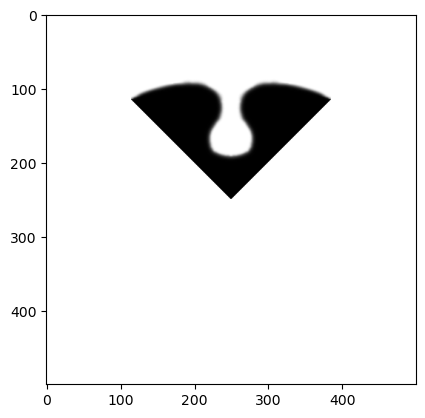

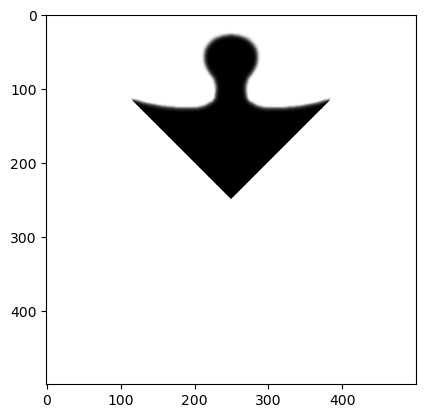

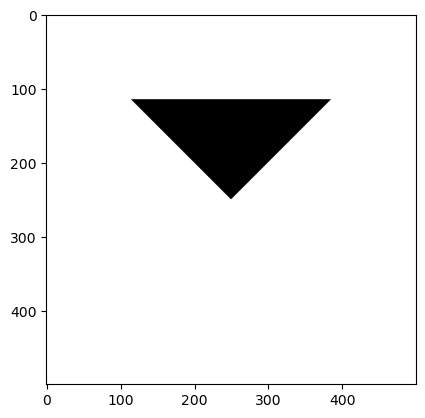

/var/folders/3x/d29th4291nl156k8mfyg7fyc0000gn/T/ipykernel_56145/799192013.py:21: RuntimeWarning: invalid value encountered in true_divide
  combined_image[:, :, c] = (


Generating puzzle base pieces.
Image combinations generated.


In [31]:
# Load your images here
img_paths = ['./PuzzleBasePieces/v2/base_0.png', './PuzzleBasePieces/v2/base_1.png', './PuzzleBasePieces/v2/base_2.png']
images = [cv2.imread(img_path, cv2.IMREAD_UNCHANGED) for img_path in img_paths]

show_imgs(images)

output_path = 'PuzzleBase/v2'
generate_image_combinations(images, output_path)